In [97]:
import pandas as pd
import re
import nltk
from nltk.stem import WordNetLemmatizer
import numpy as np
import matplotlib.pyplot as plt
from kneed import KneeLocator

In [100]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/jbrichardet/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jbrichardet/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jbrichardet/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/jbrichardet/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

# Import des données

In [3]:
dataset = pd.read_csv('dataset.csv', index_col='Id')
dataset

,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,...,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense
Id,,,,,,,,,,,,,,,,,,,,,
4,1,7.0,NaN,2008-07-31 21:42:52,NaN,752,62551.0,<p>I want to use a <code>Track-Bar</code> to c...,8.0,NaN,...,2021-02-26 03:31:15,2021-11-15 21:15:29,How to convert a Decimal to a Double in C#?,<c#><floating-point><type-conversion><double><...,12.0,3,59.0,NaN,2012-10-31 16:42:47,CC BY-SA 4.0
6,1,31.0,NaN,2008-07-31 22:08:08,NaN,312,22333.0,<p>I have an absolutely positioned <code>div</...,9.0,NaN,...,2021-01-29 18:46:45,2021-01-29 18:46:45,Why did the width collapse in the percentage w...,<html><css><internet-explorer-7>,7.0,0,13.0,NaN,NaN,CC BY-SA 4.0
7,2,NaN,4.0,2008-07-31 22:17:57,NaN,499,NaN,<p>An explicit cast to <code>double</code> lik...,9.0,NaN,...,2019-10-21 14:03:54,2019-10-21 14:03:54,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 4.0
9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,2081,716062.0,<p>Given a <code>DateTime</code> representing ...,1.0,NaN,...,2021-01-05 17:33:32,2022-01-11 15:25:07,How do I calculate someone's age based on a Da...,<c#><.net><datetime>,69.0,10,484.0,NaN,2011-08-16 19:40:43,CC BY-SA 4.0
11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1598,186201.0,<p>Given a specific <code>DateTime</code> valu...,1.0,NaN,...,2017-06-04 15:51:19,2021-09-01 21:49:09,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,40.0,3,552.0,NaN,2009-09-04 13:15:59,CC BY-SA 3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99988,2,NaN,96448.0,2008-09-19 06:04:43,NaN,0,NaN,<p>If you figure out how to get the file parse...,16947.0,RKitson,...,NaN,2008-09-19 06:04:43,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 2.5
99990,2,NaN,39473.0,2008-09-19 06:05:18,NaN,24,NaN,<p>One thing to be very wary of in CUDA is tha...,18528.0,Matt J,...,2008-10-20 06:12:18,2008-10-20 06:12:18,NaN,NaN,NaN,1,NaN,NaN,2008-09-19 06:05:18,CC BY-SA 2.5
99992,2,NaN,92651.0,2008-09-19 06:05:48,NaN,0,NaN,"<p>Google doesn't understand javascript, if th...",6449.0,Dave Cheney,...,NaN,2008-09-19 06:05:48,NaN,NaN,NaN,0,NaN,NaN,NaN,CC BY-SA 2.5


# Tokenization

In [4]:
html_tags_re = re.compile("<.+?>|\\n|\\/g")
posts = dataset['Body'].str.replace(html_tags_re, '')

In [5]:
tokenizer = nltk.RegexpTokenizer(r'\w+')
tokens = posts.str.lower().map(tokenizer.tokenize)
tokens

Id
4        [i, want, to, use, a, track, bar, to, change, ...
6        [i, have, an, absolutely, positioned, div, con...
7        [an, explicit, cast, to, double, like, this, i...
9        [given, a, datetime, representing, a, person, ...
11       [given, a, specific, datetime, value, how, do,...
                               ...                        
99988    [if, you, figure, out, how, to, get, the, file...
99990    [one, thing, to, be, very, wary, of, in, cuda,...
99992    [google, doesn, t, understand, javascript, if,...
99993    [to, minimize, construct, destruct, latency, y...
99999    [my, question, is, pretty, straightforward, yo...
Name: Body, Length: 57525, dtype: object

## Nombre de mots par post

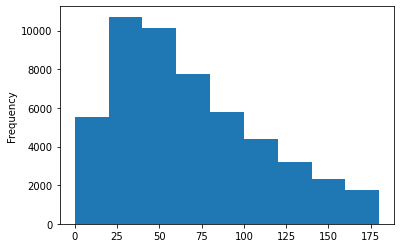

count    57525.000000
mean        89.744163
std         91.083359
min          0.000000
25%         36.000000
50%         65.000000
75%        114.000000
max       2875.000000
Name: Body, dtype: float64

In [6]:
posts_size = tokens.map(len)
posts_size.plot.hist(bins=np.arange(0, 200, 20))
plt.show()
posts_size.describe()

## Nombre de mots uniques par post

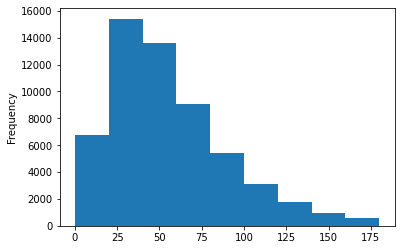

count    57525.000000
mean        57.675811
std         40.855461
min          0.000000
25%         30.000000
50%         48.000000
75%         75.000000
max       1128.000000
Name: Body, dtype: float64

In [7]:
posts_unique_size = tokens.map(lambda x: len(np.unique(x)))
posts_unique_size.plot.hist(bins=np.arange(0,200,20))
plt.show()
posts_unique_size.describe()

# Recherche des mots les plus courants

In [8]:
vocabulary = tokens.to_frame().apply(lambda x : pd.Series([x['Body'], nltk.FreqDist(x['Body'])], index=['tokens', 'frequency']), axis=1, result_type='expand')
vocabulary

,tokens,frequency
Id,,
4,"[i, want, to, use, a, track, bar, to, change, ...","{'i': 2, 'want': 1, 'to': 3, 'use': 1, 'a': 3,..."
6,"[i, have, an, absolutely, positioned, div, con...","{'i': 4, 'have': 1, 'an': 3, 'absolutely': 1, ..."
7,"[an, explicit, cast, to, double, like, this, i...","{'an': 1, 'explicit': 1, 'cast': 1, 'to': 1, '..."
9,"[given, a, datetime, representing, a, person, ...","{'given': 1, 'a': 2, 'datetime': 1, 'represent..."
11,"[given, a, specific, datetime, value, how, do,...","{'given': 1, 'a': 1, 'specific': 1, 'datetime'..."
...,...,...
99988,"[if, you, figure, out, how, to, get, the, file...","{'if': 1, 'you': 1, 'figure': 1, 'out': 1, 'ho..."
99990,"[one, thing, to, be, very, wary, of, in, cuda,...","{'one': 2, 'thing': 1, 'to': 12, 'be': 3, 'ver..."
99992,"[google, doesn, t, understand, javascript, if,...","{'google': 2, 'doesn': 1, 't': 2, 'understand'..."


In [9]:
dfs = [pd.DataFrame.from_dict(value, orient='index') for value in vocabulary['frequency'].values]
dfs

[             0
 i            2
 want         1
 to           3
 use          1
 a            3
 track        1
 bar          1
 change       1
 form         1
 s            1
 opacity      2
 this         3
 is           1
 my           1
 code         2
 decimal      2
 trans        3
 trackbar1    1
 value        1
 5000         1
 when         1
 build        1
 the          3
 application  1
 it           1
 gives        1
 following    1
 error        1
 cannot       1
 implicitly   1
 convert      1
 type         1
 doublei      1
 have         1
 tried        1
 using        1
 and          1
 double       1
 but          1
 then         1
 control      1
 doesn        1
 t            1
 work         1
 worked       1
 fine         1
 in           1
 past         1
 vb           1
 net          1
 project      1,
                0
 i              4
 have           1
 an             3
 absolutely     1
 positioned     3
 div            3
 containing     1
 several        1
 chil

In [19]:
total_freq = {}
for dictionnary in vocabulary['frequency']:
    for k,v in dictionnary.items():
        if k in total_freq:
            total_freq[k] += v
        else:
            total_freq[k] = v

In [30]:
freq_list = sorted(total_freq.items(), key=lambda x: x[1], reverse=True)
freq_list

[('the', 229292),
 ('to', 149988),
 ('a', 125716),
 ('i', 92638),
 ('you', 90400),
 ('and', 83904),
 ('is', 79211),
 ('of', 76494),
 ('it', 71593),
 ('in', 69455),
 ('that', 63813),
 ('for', 52314),
 ('this', 44343),
 ('if', 38297),
 ('be', 36065),
 ('on', 33116),
 ('with', 33020),
 ('can', 32396),
 ('s', 30688),
 ('as', 30678),
 ('have', 30580),
 ('t', 29137),
 ('gt', 28503),
 ('are', 27980),
 ('but', 26598),
 ('your', 26516),
 ('not', 25427),
 ('lt', 25239),
 ('or', 24050),
 ('use', 23429),
 ('an', 22153),
 ('do', 19687),
 ('from', 19340),
 ('will', 17377),
 ('there', 17304),
 ('code', 17116),
 ('so', 16600),
 ('using', 16507),
 ('like', 16378),
 ('would', 15205),
 ('what', 14942),
 ('all', 14136),
 ('at', 14000),
 ('1', 13884),
 ('which', 13693),
 ('then', 13528),
 ('my', 13511),
 ('0', 13418),
 ('by', 13300),
 ('some', 13296),
 ('one', 13164),
 ('when', 12626),
 ('just', 12555),
 ('c', 11886),
 ('get', 11315),
 ('way', 11056),
 ('need', 10997),
 ('want', 10893),
 ('file', 10841),
 

In [37]:
idx, values = zip(*freq_list)
frequencies = pd.Series(values, idx)
frequencies.describe()

count    114377.000000
mean         45.136111
std        1233.749602
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max      229292.000000
dtype: float64

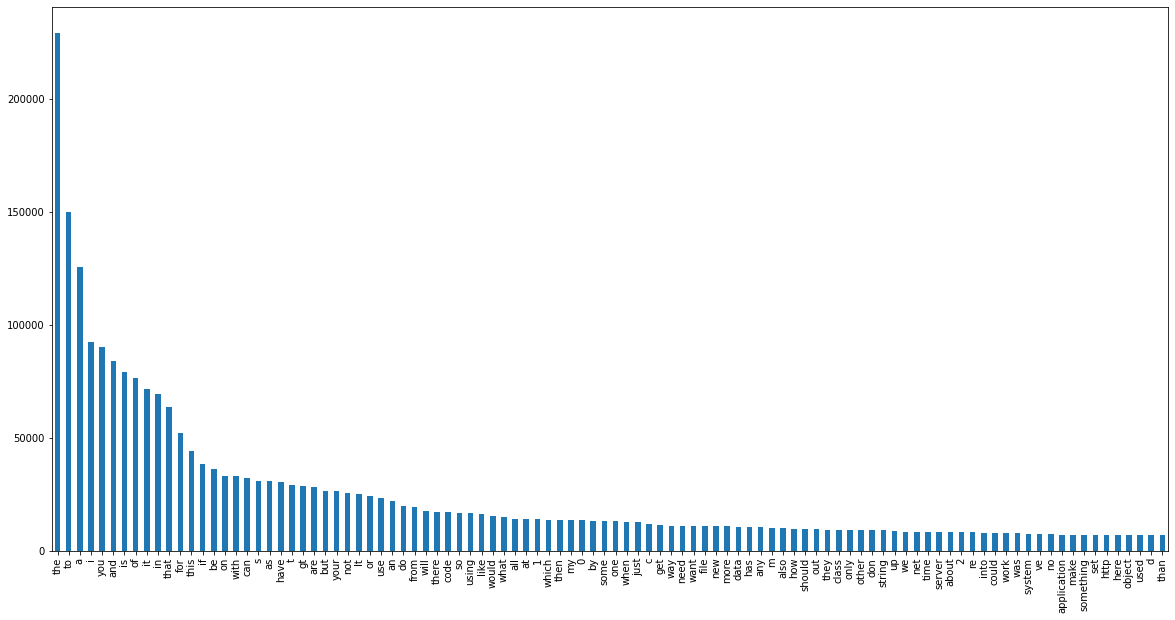

count       100.000000
mean      24980.320000
std       32956.918243
min        6762.000000
25%        8901.500000
50%       13230.000000
75%       26536.500000
max      229292.000000
dtype: float64

In [60]:
top = frequencies.head(100)
top.plot(kind='bar', figsize=(20, 10))
plt.show()
top.describe()

15

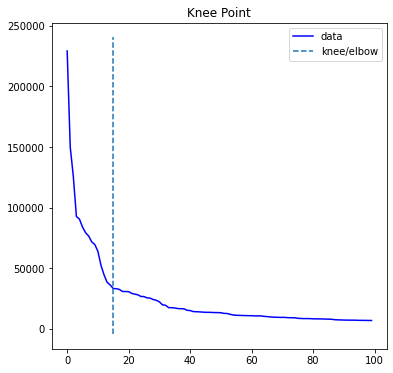

In [72]:
knee = KneeLocator([i for i,_ in enumerate(top.index.values)], top.values, curve='convex', direction='decreasing')
knee.plot_knee()
knee.knee

In [61]:
frequencies.iloc[:knee.knee+1]

the     229292
to      149988
a       125716
i        92638
you      90400
and      83904
is       79211
of       76494
it       71593
in       69455
that     63813
for      52314
this     44343
if       38297
be       36065
on       33116
dtype: int64

# Création d'une liste de stopwords

In [67]:
en_stopwords = nltk.corpus.stopwords.words('english')
to_drop = frequencies.index.intersection(en_stopwords)
to_drop

Index(['the', 'to', 'a', 'i', 'you', 'and', 'is', 'of', 'it', 'in',
       ...
       'ain', 'theirs', 'whom', 'ours', 'ma', 'needn', 'yourselves', 'mustn',
       'herself', 'shan'],
      dtype='object', length=151)

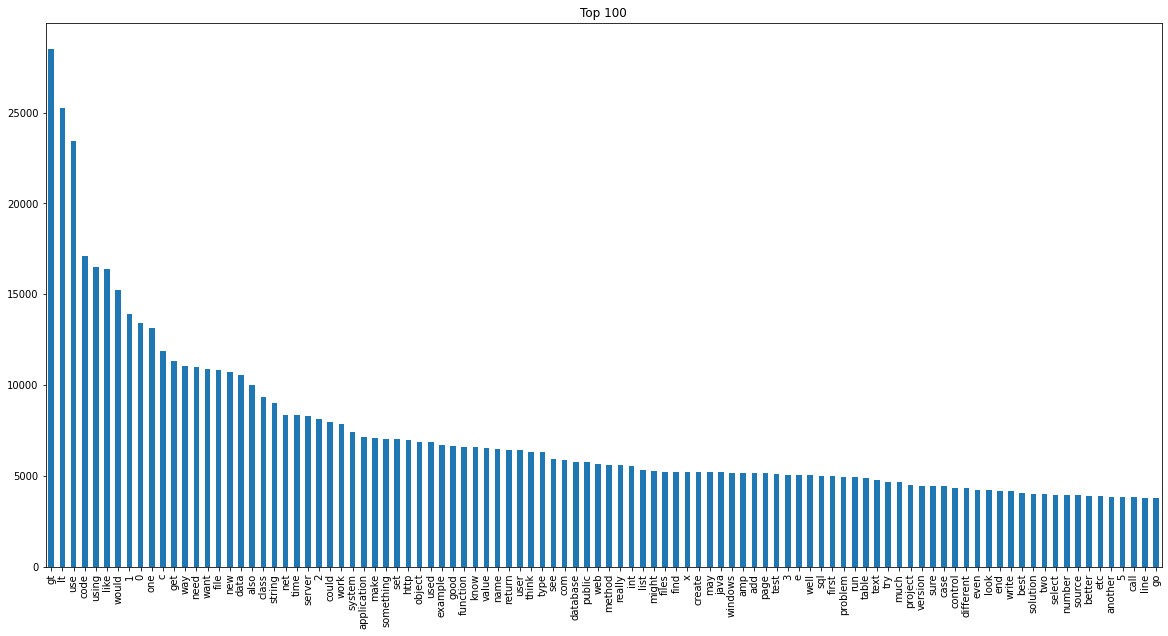

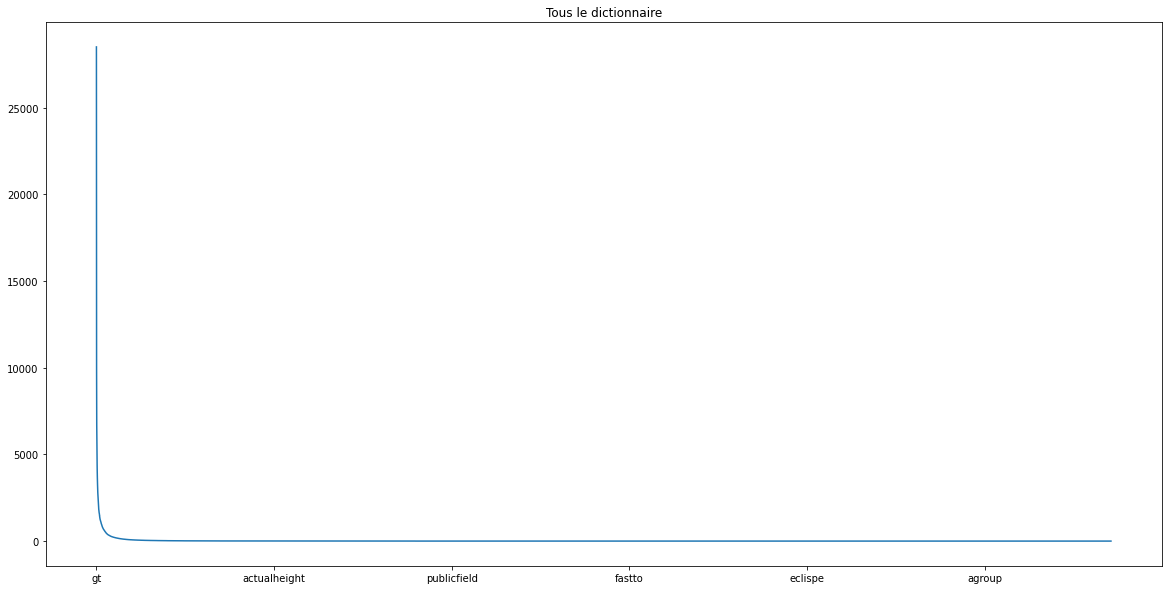

count    114226.000000
mean         25.343083
std         285.929198
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max       28503.000000
dtype: float64

In [71]:
freq_wo_stop = frequencies.drop(to_drop)
freq_wo_stop.head(100).plot(kind='bar', figsize=(20,10))
plt.title('Top 100')
plt.show()
freq_wo_stop.plot(figsize=(20,10))
plt.title('Tous le dictionnaire')
plt.show()
freq_wo_stop.describe()

306

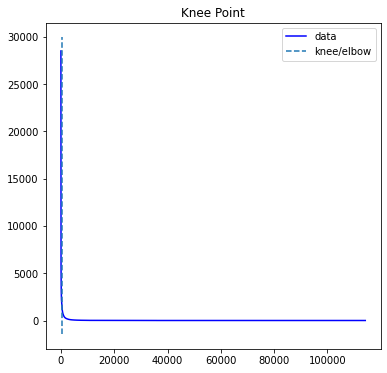

In [78]:
knee = KneeLocator([i for i,_ in enumerate(freq_wo_stop.index.values)], freq_wo_stop.values, curve='convex', direction='decreasing')
knee.plot_knee()
knee.knee

In [82]:
sw = freq_wo_stop[:knee.knee+1].index.tolist() + en_stopwords
sw

['gt',
 'lt',
 'use',
 'code',
 'using',
 'like',
 'would',
 '1',
 '0',
 'one',
 'c',
 'get',
 'way',
 'need',
 'want',
 'file',
 'new',
 'data',
 'also',
 'class',
 'string',
 'net',
 'time',
 'server',
 '2',
 'could',
 'work',
 'system',
 'application',
 'make',
 'something',
 'set',
 'http',
 'object',
 'used',
 'example',
 'good',
 'function',
 'know',
 'value',
 'name',
 'return',
 'user',
 'think',
 'type',
 'see',
 'com',
 'database',
 'public',
 'web',
 'method',
 'really',
 'int',
 'list',
 'might',
 'files',
 'find',
 'x',
 'create',
 'may',
 'java',
 'windows',
 'amp',
 'add',
 'page',
 'test',
 '3',
 'e',
 'well',
 'sql',
 'first',
 'problem',
 'run',
 'table',
 'text',
 'try',
 'much',
 'project',
 'version',
 'sure',
 'case',
 'control',
 'different',
 'even',
 'look',
 'end',
 'write',
 'best',
 'solution',
 'two',
 'select',
 'number',
 'source',
 'better',
 'etc',
 'another',
 '5',
 'call',
 'line',
 'go',
 'question',
 'however',
 'things',
 'id',
 'check',
 'b',
 'n'

# Recalcul de la taille par post sans stopwords

In [93]:
normalized_tokens = posts.str.lower().map(lambda x: [token for token in tokenizer.tokenize(x) if not token in sw])
normalized_tokens

Id
4        [track, bar, opacity, decimal, trans, trackbar...
6        [absolutely, positioned, div, containing, seve...
7        [explicit, cast, double, necessary, double, tr...
9        [given, datetime, representing, person, birthd...
11       [given, datetime, display, relative, hours, ag...
                               ...                        
99988    [figure, parsed, datatable, suggest, sqlbulkin...
99990    [wary, cuda, divergent, flow, kernel, absolute...
99992                           [understand, pages, links]
99993    [minimize, construct, destruct, latency, fully...
99999    [straightforward, executable, outputs, granted...
Name: Body, Length: 57525, dtype: object

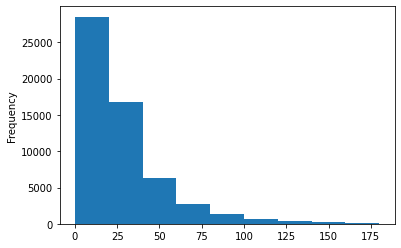

count    57525.000000
mean        28.958296
std         36.082614
min          0.000000
25%         11.000000
50%         20.000000
75%         35.000000
max       2169.000000
Name: Body, dtype: float64

In [94]:
norm_posts_size = normalized_tokens.map(len)
norm_posts_size.plot.hist(bins=np.arange(0, 200, 20))
plt.show()
norm_posts_size.describe()

# Lemmatisation

In [105]:
wnl = WordNetLemmatizer()
lem_tokens = normalized_tokens.map(lambda x: [wnl.lemmatize(w) for w in x])
lem_tokens

Id
4        [track, bar, opacity, decimal, trans, trackbar...
6        [absolutely, positioned, div, containing, seve...
7        [explicit, cast, double, necessary, double, tr...
9        [given, datetime, representing, person, birthd...
11       [given, datetime, display, relative, hour, ago...
                               ...                        
99988    [figure, parsed, datatable, suggest, sqlbulkin...
99990    [wary, cuda, divergent, flow, kernel, absolute...
99992                             [understand, page, link]
99993    [minimize, construct, destruct, latency, fully...
99999    [straightforward, executable, output, granted,...
Name: Body, Length: 57525, dtype: object

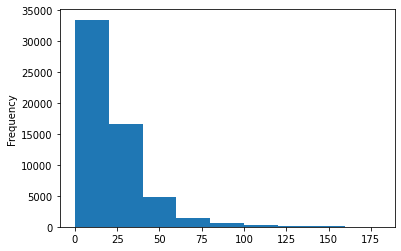

count    57525.000000
mean        21.944476
std         20.211873
min          0.000000
25%          9.000000
50%         17.000000
75%         28.000000
max        982.000000
Name: Body, dtype: float64

In [104]:
lem_posts_unique_size = lem_tokens.map(lambda x: len(np.unique(x)))
lem_posts_unique_size.plot.hist(bins=np.arange(0,200,20))
plt.show()
lem_posts_unique_size.describe()